## **Chicago Crime Data Analysis** ##

In [1]:
# Install required packages
# %pip install gdown dask pyarrow

## **Dataset Setup and Loading**

In [1]:
# Import the necessary libraries
import gdown
import zipfile


#libraries for data wrangling
import pandas as pd
import numpy as np

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns


# import dask.dataframe as dd

In [2]:
#set up views
pd.set_option('display.max_columns', None)
pd.set_option("display.width", 1000)

In [4]:
# Download dataset from Google Drive
# rawlink= "https://drive.google.com/file/d/1ib1PWK_3oaaSfThqfnfSoPZq7vA1g33X/view?usp=sharing"
# file_id = "1ib1PWK_3oaaSfThqfnfSoPZq7vA1g33X"
# output = "crime.zip"
# gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

In [5]:
# with zipfile.ZipFile(output, "r") as z:
#     # List files
#     print(z.namelist())
#     z.extractall("crime_data")

In [3]:
# Explicitly defining data types for each column in the Crimes dataset to reduce memory usage
dtypes_dict = {
    'ID': 'Int32',                 
    'Case Number': 'string',        
    'Block': 'string',              
    'IUCR': 'string',              
    'Primary Type': 'category',    
    'Description': 'category',      
    'Location Description': 'category', 
    'Arrest': 'boolean',              
    'Domestic': 'boolean',             
    'Beat': 'Int16',                
    'District': 'Int8',             
    'Ward': 'Int8',                
    'Community Area': 'Int8',      
    'FBI Code': 'category',         
    'X Coordinate': 'float32',      
    'Y Coordinate': 'float32',     
    'Year': 'float64',             
    'Latitude': 'float32',         
    'Longitude': 'float32',        
    'Location': 'string'            
}

crime_data = pd.read_csv(
    "crime_data/Crimes_-_2001_to_Present.csv",
    dtype=dtypes_dict,
    parse_dates=['Date', 'Updated On'],
    date_format="%m/%d/%Y %I:%M:%S %p",
    keep_default_na=True,
    low_memory=False
)



# Preview the first 5 rows of the dataset
crime_data.head()


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9,12,61,08B,1165074.0,1875917.0,2015.0,2018-02-10 15:50:01,41.815117,-87.669998,"(41.815117282, -87.669999562)"
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15,29,25,06,1138875.0,1904869.0,2015.0,2018-02-10 15:50:01,41.895081,-87.765404,"(41.895080471, -87.765400451)"
2,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6,8,44,06,NaN,NaN,2018.0,2019-04-06 16:04:43,NaN,NaN,<NA>
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14,35,21,18,1152037.0,1920384.0,2015.0,2018-02-10 15:50:01,41.937405,-87.716652,"(41.937405765, -87.716649687)"
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15,28,25,08A,1141706.0,1900086.0,2015.0,2018-02-10 15:50:01,41.881905,-87.755119,"(41.881903443, -87.755121152)"


## **Preliminary Data Analysis**

In [10]:
# copying the data into a new variable for wrangling
crime_data2 = crime_data.copy()
crime_data2.head(1)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9,12,61,08B,1165074.0,1875917.0,2015.0,2018-02-10 15:50:01,41.815117,-87.669998,"(41.815117282, -87.669999562)"


In [11]:
crime_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7784664 entries, 0 to 7784663
Data columns (total 22 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    Int32         
 1   Case Number           string        
 2   Date                  datetime64[ns]
 3   Block                 string        
 4   IUCR                  string        
 5   Primary Type          category      
 6   Description           category      
 7   Location Description  category      
 8   Arrest                boolean       
 9   Domestic              boolean       
 10  Beat                  Int16         
 11  District              Int8          
 12  Ward                  Int8          
 13  Community Area        Int8          
 14  FBI Code              category      
 15  X Coordinate          float32       
 16  Y Coordinate          float32       
 17  Year                  float64       
 18  Updated On            datetime64[ns]
 19  

In [12]:
# Checking the  data types
crime_data2.dtypes

ID                               Int32
Case Number             string[python]
Date                    datetime64[ns]
Block                   string[python]
IUCR                    string[python]
Primary Type                  category
Description                   category
Location Description          category
Arrest                         boolean
Domestic                       boolean
Beat                             Int16
District                          Int8
Ward                              Int8
Community Area                    Int8
FBI Code                      category
X Coordinate                   float32
Y Coordinate                   float32
Year                           float64
Updated On              datetime64[ns]
Latitude                       float32
Longitude                      float32
Location                string[python]
dtype: object

In [25]:
# Check column names
crime_data2.columns

Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type', 'description', 'location_description', 'arrest', 'domestic', 'beat', 'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate', 'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude', 'location'], dtype='object')

In [26]:
# Preview first 5 rows
crime_data2.head()


,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9,12,61,08B,1165074.0,1875917.0,2015.0,2018-02-10 15:50:01,41.815117,-87.669998,"(41.815117282, -87.669999562)"
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15,29,25,06,1138875.0,1904869.0,2015.0,2018-02-10 15:50:01,41.895081,-87.765404,"(41.895080471, -87.765400451)"
2,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6,8,44,06,NaN,NaN,2018.0,2019-04-06 16:04:43,NaN,NaN,<NA>
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14,35,21,18,1152037.0,1920384.0,2015.0,2018-02-10 15:50:01,41.937405,-87.716652,"(41.937405765, -87.716649687)"
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15,28,25,08A,1141706.0,1900086.0,2015.0,2018-02-10 15:50:01,41.881905,-87.755119,"(41.881903443, -87.755121152)"


In [27]:
# Rename all columns to lowercase and replace spaces with underscores
crime_data2= crime_data2.rename(columns=lambda x: x.strip().lower().replace(" ", "_"))

In [28]:
# Preview updated column names
crime_data2.columns

Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type', 'description', 'location_description', 'arrest', 'domestic', 'beat', 'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate', 'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude', 'location'], dtype='object')

In [30]:
# Converting the date to datetime
crime_data2['date'] = pd.to_datetime(crime_data2['date'])

In [33]:
crime_data_type= crime_data2['date'].dtypes
print("Data type\n:", crime_data_type)

Data type
: datetime64[ns]


In [31]:
crime_data2['updated_on'] = pd.to_datetime(crime_data2['updated_on'])

In [32]:
updated_date_data_type= crime_data2['updated_on'].dtypes
print("Updated Date Data type\n:", updated_date_data_type)

Updated Date Data type
: datetime64[ns]


In [29]:
crime_data2.head()

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9,12,61,08B,1165074.0,1875917.0,2015.0,2018-02-10 15:50:01,41.815117,-87.669998,"(41.815117282, -87.669999562)"
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15,29,25,06,1138875.0,1904869.0,2015.0,2018-02-10 15:50:01,41.895081,-87.765404,"(41.895080471, -87.765400451)"
2,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6,8,44,06,NaN,NaN,2018.0,2019-04-06 16:04:43,NaN,NaN,<NA>
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14,35,21,18,1152037.0,1920384.0,2015.0,2018-02-10 15:50:01,41.937405,-87.716652,"(41.937405765, -87.716649687)"
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15,28,25,08A,1141706.0,1900086.0,2015.0,2018-02-10 15:50:01,41.881905,-87.755119,"(41.881903443, -87.755121152)"


**Analyzing the missing data**

_____________________

Missing DATA ANALYSIS
_____________________
                                   Columns  Missing_count  Missing_percentage       Data_type
ward                                  ward         614848            7.898196            Int8
community_area              community_area         613476            7.880571            Int8
longitude                        longitude          86848            1.115629         float32
latitude                          latitude          86848            1.115629         float32
x_coordinate                  x_coordinate          86848            1.115629         float32
y_coordinate                  y_coordinate          86848            1.115629         float32
location                          location          86848            1.115629  string[python]
location_description  location_description          10381            0.133352        category
district                          district             47            0.000604          

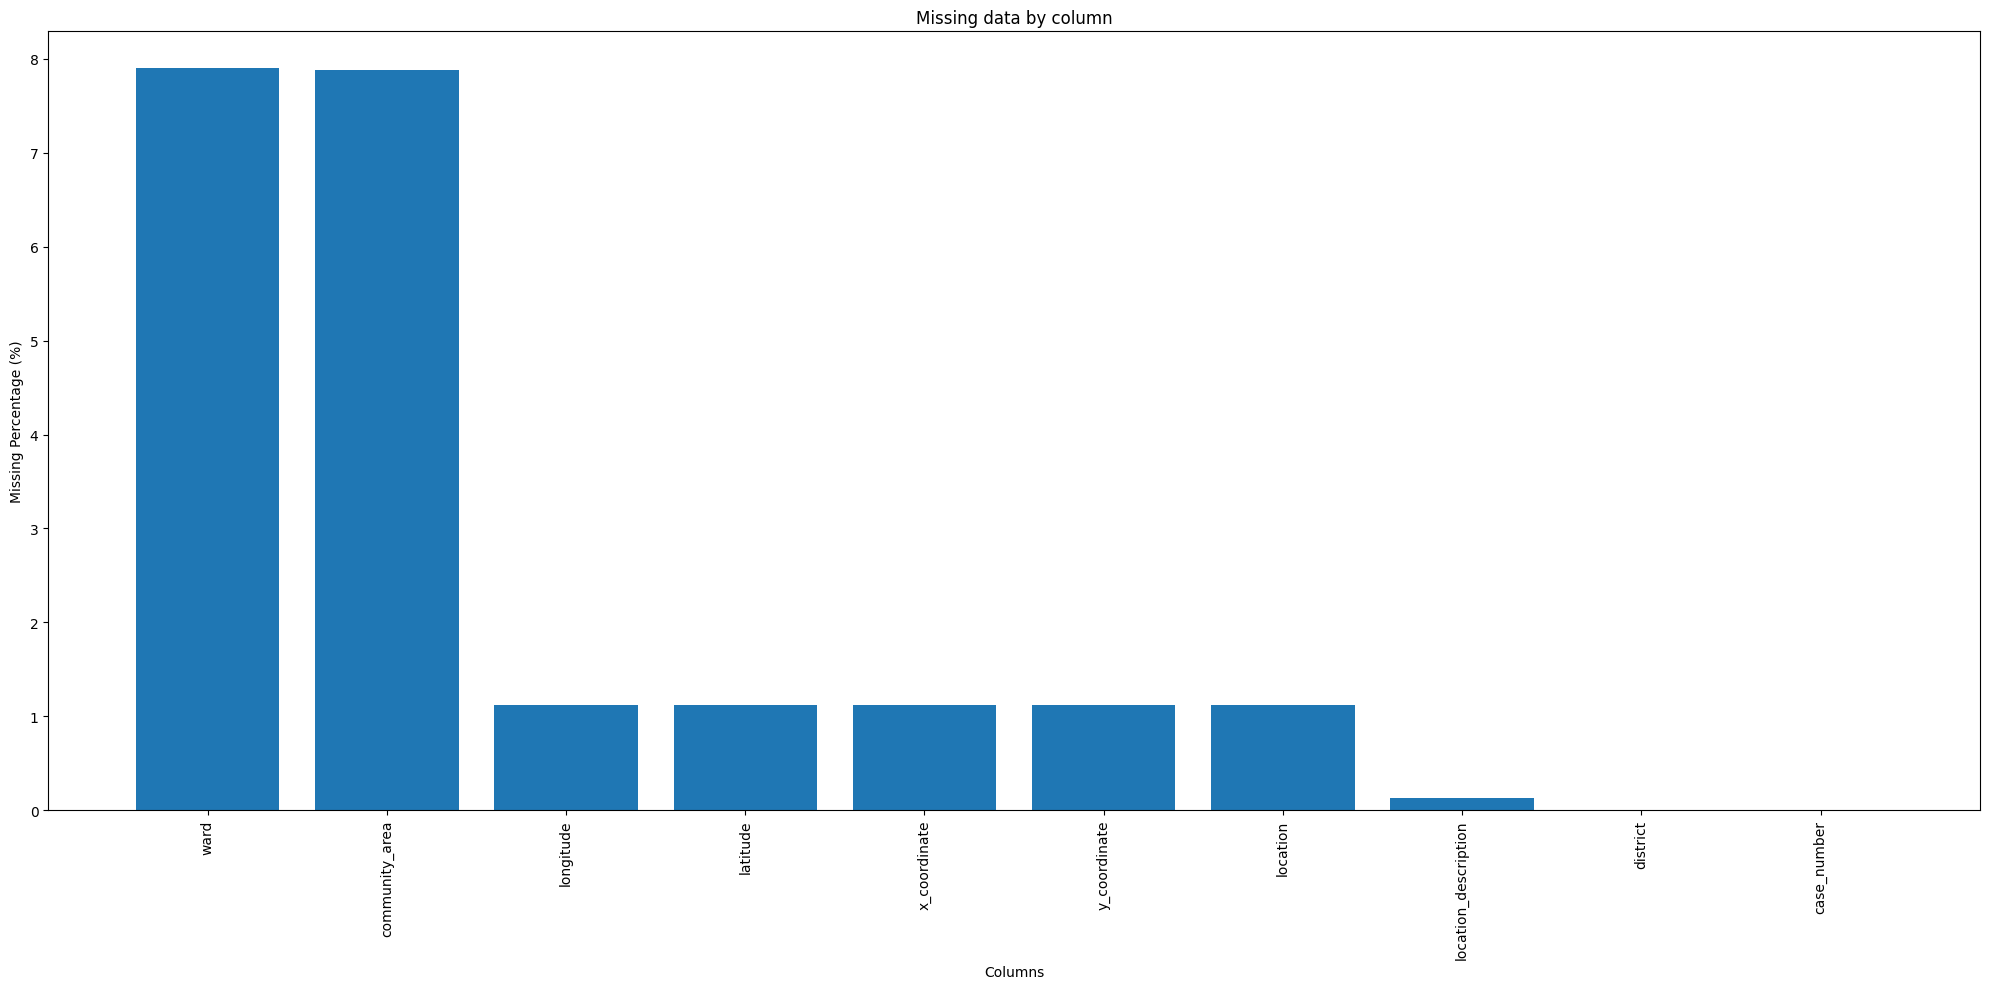

In [34]:
# Defining a function to analyze the mssing data
def missing_data(crime_data2):
    """Analyzing missing data in the dataset"""

    missing_data = pd.DataFrame({
            'Columns': crime_data2.columns,
            'Missing_count': crime_data2.isnull().sum(),
            'Missing_percentage': (crime_data2.isnull().sum()/ len(crime_data2) * 100),
            'Data_type': crime_data2.dtypes
    })

    missing_data = missing_data[missing_data['Missing_count'] > 0]. sort_values('Missing_percentage', ascending=False)

    print('_____________________\n')
    print('Missing DATA ANALYSIS')
    print('_____________________')

    print(missing_data)
    # Visualizing missing data
    plt.figure(figsize=(20,10))
    plt.bar(missing_data['Columns'], missing_data['Missing_percentage'])
    plt.title('Missing data by column')
    plt.xlabel('Columns')
    plt.ylabel('Missing Percentage (%)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

missing_data(crime_data2)

In [35]:
# checking for missing values
crime_data2.isnull().sum()

id                           0
case_number                  4
date                         0
block                        0
iucr                         0
primary_type                 0
description                  0
location_description     10381
arrest                       0
domestic                     0
beat                         0
district                    47
ward                    614848
community_area          613476
fbi_code                     0
x_coordinate             86848
y_coordinate             86848
year                         0
updated_on                   0
latitude                 86848
longitude                86848
location                 86848
dtype: int64

In [36]:
# Dropping the missing values
crime_data2.dropna(inplace=True)


In [37]:
#Check for missing values in each column
crime_data.isna().sum()

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     10381
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614848
Community Area          613476
FBI Code                     0
X Coordinate             86848
Y Coordinate             86848
Year                         0
Updated On                   0
Latitude                 86848
Longitude                86848
Location                 86848
dtype: int64

In [38]:
# checking for duplicate values
crime_data2.duplicated().sum()

np.int64(0)

In [39]:

# checking for empty values
crime_data2.empty

False

## **Exploratory Data Analysis**

In [40]:
# checking the number of years of the data and converting the year column to Integer
crime_data2["year"] = crime_data2["year"].astype("int").astype("int")

In [41]:
# checking the years in the dataset
crime_data_years= crime_data2["year"].unique()
print(f"The years in the dataset are\n{crime_data_years}")

The years in the dataset are
[2015 2014 2020 2019 2021 2012 2011 2013 2010 2017 2018 2016 2008 2007
 2009 2023 2022 2006 2005 2002 2001 2003 2004]


In [42]:
# checking the number of unique years in the data
crime_data_years_no= crime_data2["year"].nunique()
print(f"Chicago crime dataset for {crime_data_years_no} years\n")

Chicago crime dataset for 23 years



In [43]:
# Checking the size of the dataset
crime_data2.shape

(7084435, 22)

In [44]:
crime_data2.info

<bound method DataFrame.info of                id case_number                date                block  iucr        primary_type                    description             location_description  arrest  domestic  beat  district  ward  community_area fbi_code  x_coordinate  y_coordinate  year          updated_on   latitude  longitude                       location
0        10224738    HY411648 2015-09-05 13:30:00      043XX S WOOD ST  0486             BATTERY        DOMESTIC BATTERY SIMPLE                        RESIDENCE   False      True   924         9    12              61      08B     1165074.0     1875917.0  2015 2018-02-10 15:50:01  41.815117 -87.669998  (41.815117282, -87.669999562)
1        10224739    HY411615 2015-09-04 11:30:00  008XX N CENTRAL AVE  0870               THEFT                 POCKET-PICKING                          CTA BUS   False     False  1511        15    29              25       06     1138875.0     1904869.0  2015 2018-02-10 15:50:01  41.895081 -87.765404 

## Descriptive Analysis (Numerical variables)
- Using the .describe() function.

In [45]:
# Select numeric columns only 
numeric_cols = crime_data.select_dtypes(include=["number"]).columns

# checking the statistical summary of the data
numeric_summary = crime_data[numeric_cols].astype("float64").describe()

print("Numeric Summary",numeric_summary)



Numeric Summary                  ID          Beat      District          Ward  Community Area  X Coordinate  Y Coordinate          Year      Latitude     Longitude
count  7.784664e+06  7.784664e+06  7.784617e+06  7.169816e+06    7.171188e+06  7.697816e+06  7.697816e+06  7.784664e+06  7.697816e+06  7.697816e+06
mean   7.026439e+06  1.185918e+03  1.129466e+01  2.275420e+01    3.748472e+01  1.164601e+06  1.885783e+06  2.009944e+03  4.184218e+01 -8.767149e+01
std    3.502657e+06  7.031335e+02  6.952422e+00  1.385106e+01    2.154115e+01  1.684658e+04  3.227531e+04  6.260628e+00  8.879600e-02  6.108257e-02
min    6.340000e+02  1.110000e+02  1.000000e+00  1.000000e+00    0.000000e+00  0.000000e+00  0.000000e+00  2.001000e+03  3.661945e+01 -9.168657e+01
25%    3.792574e+06  6.210000e+02  6.000000e+00  1.000000e+01    2.300000e+01  1.152976e+06  1.859073e+06  2.005000e+03  4.176871e+01 -8.771367e+01
50%    7.029327e+06  1.034000e+03  1.000000e+01  2.300000e+01    3.200000e+01  1.166110e+06  1.8

In [ ]:
# # extracting the year, month, week, day, hour, quarter and weekends from the dataset 
crime_data2["year"]= crime_data2['date'].dt.year
crime_data2["month"] = crime_data2["date"].dt.month_name()
crime_data2['day'] = crime_data2['date'].dt.day
crime_data2['hour'] = crime_data2['date'].dt.hour
crime_data2['day_of_week'] = crime_data2['date'].dt.dayofweek  # 0=Monday, 6=Sunday
crime_data2['day_name'] = crime_data2['date'].dt.day_name()
crime_data2['month_name'] = crime_data2['date'].dt.month_name()
crime_data2['quarter'] = crime_data2['date'].dt.quarter
crime_data2['weekend'] = crime_data2['day_of_week'].isin([5, 6])#Saturday and Sunday

# Time periods
crime_data2['time_period'] = pd.cut(crime_data2['hour'], 
                              bins=[0, 6, 12, 18, 24], 
                              labels=['Night', 'Morning', 'Afternoon', 'Evening'],
                              include_lowest=True)

# Applying the new date features to the dataset
print("Data Extracted Successfully,New Columns added\n")
crime_data2.head()

Data Extracted Successfully,New Columns added



,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location,month,day,hour,day_of_week,day_name,month_name,quarter,is_weekend,time_period,weekend
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9,12,61,08B,1165074.0,1875917.0,2015,2018-02-10 15:50:01,41.815117,-87.669998,"(41.815117282, -87.669999562)",September,5,13,5,Saturday,September,3,True,Afternoon,True
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15,29,25,06,1138875.0,1904869.0,2015,2018-02-10 15:50:01,41.895081,-87.765404,"(41.895080471, -87.765400451)",September,4,11,4,Friday,September,3,False,Morning,False
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14,35,21,18,1152037.0,1920384.0,2015,2018-02-10 15:50:01,41.937405,-87.716652,"(41.937405765, -87.716649687)",September,5,12,5,Saturday,September,3,True,Morning,True
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15,28,25,08A,1141706.0,1900086.0,2015,2018-02-10 15:50:01,41.881905,-87.755119,"(41.881903443, -87.755121152)",September,5,13,5,Saturday,September,3,True,Afternoon,True
5,10224742,HY411435,2015-09-05 10:55:00,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6,21,71,05,1168430.0,1850165.0,2015,2018-02-10 15:50:01,41.744377,-87.658432,"(41.744378879, -87.658430635)",September,5,10,5,Saturday,September,3,True,Morning,True


In [31]:
# checking the columns in the dataset for the new columns added
crime_data2.columns

Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type', 'description', 'location_description', 'arrest', 'domestic', 'beat', 'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate', 'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude', 'location', 'month', 'day', 'hour', 'day_of_week', 'day_name', 'month_name', 'quarter', 'is_weekend', 'time_period', 'weekend'], dtype='object')

# Certain Crimes in the last ten years

In [46]:
# Filter the dataset for the last 10 years (2013–2023)
crime_ten_yrs = crime_data2[crime_data2["year"] >= 2013]
crime_ten_yrs.tail(1000)

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
7783640,12746978,JF299906,2022-06-30 12:40:00,012XX W AINSLIE ST,1330,CRIMINAL TRESPASS,TO LAND,LIBRARY,False,False,2033,20,46,3,26,1167282.0,1932906.0,2022,2023-01-03 15:46:28,41.971451,-87.660263,"(41.971452044, -87.660260415)"
7783641,12751810,JF306301,2022-07-05 14:18:00,055XX S AUSTIN AVE,0810,THEFT,OVER $500,STREET,False,False,811,8,13,56,06,1137317.0,1867128.0,2022,2023-01-03 15:46:28,41.791542,-87.772026,"(41.791541614, -87.772028588)"
7783642,12742831,JF295440,2022-06-27 02:06:00,022XX S MICHIGAN AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,132,1,3,33,08B,1177561.0,1889490.0,2022,2023-01-03 15:46:28,41.852089,-87.623787,"(41.852089006, -87.623784345)"
7783643,12740904,JF292906,2022-06-24 20:26:00,063XX S WOOD ST,3710,INTERFERENCE WITH PUBLIC OFFICER,RESIST / OBSTRUCT / DISARM OFFICER,STREET,True,False,725,7,15,67,24,1165431.0,1862554.0,2022,2023-01-03 15:46:28,41.778439,-87.669067,"(41.778440025, -87.669068807)"
7783644,12745770,JF298936,2022-06-23 12:00:00,015XX W WELLINGTON AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,APARTMENT,False,False,1932,19,32,6,11,1165599.0,1920000.0,2022,2023-01-03 15:46:28,41.936073,-87.666817,"(41.936073524, -87.666818076)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784659,12847575,JF420478,2022-09-01 05:00:00,005XX W SURF ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,1934,19,44,6,26,1172497.0,1919410.0,2022,2023-01-03 15:46:28,41.934303,-87.641487,"(41.934304581, -87.641484982)"
7784660,12847801,JF420319,2022-07-08 00:00:00,114XX S PRAIRIE AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,False,False,531,5,9,49,11,1179966.0,1828818.0,2022,2023-01-03 15:46:28,41.685543,-87.616814,"(41.685543881, -87.616812541)"
7784661,12847324,JF420102,2022-09-27 11:00:00,023XX E 70TH ST,0810,THEFT,OVER $500,RESIDENCE,False,False,331,3,5,43,06,1193181.0,1859005.0,2022,2023-01-03 15:46:28,41.768066,-87.567451,"(41.768068052, -87.567452932)"
7784662,12847570,JF420427,2022-09-03 10:25:00,052XX W CARMEN AVE,2021,NARCOTICS,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),True,False,1623,16,45,11,18,1140553.0,1933418.0,2022,2023-01-03 15:46:28,41.973392,-87.758537,"(41.973391184, -87.758534512)"


In [ ]:
# Setting 'primary_type' as the index
# crime_ten_yrs = crime_ten_yrs.set_index("primary_type")

In [47]:

# Count how many unique crime types exist in the last 10years
unique_crime_ten_yrs = crime_ten_yrs["primary_type"].nunique()
print("\nThe Number of unique crime types recorded in (2013–2023):", unique_crime_ten_yrs)



The Number of unique crime types recorded in (2013–2023): 35


In [48]:
# Get the unique crime types within the last 10 years
unique_crime_types_ten_yrs = crime_ten_yrs["primary_type"].unique()
print("The Unique crime types recorded from 2013–2023:\n", unique_crime_types_ten_yrs)

The Unique crime types recorded from 2013–2023:
 ['BATTERY', 'THEFT', 'NARCOTICS', 'ASSAULT', 'BURGLARY', ..., 'OTHER NARCOTIC VIOLATION', 'NON-CRIMINAL', 'HOMICIDE', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'RITUALISM']
Length: 35
Categories (36, object): ['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY', ..., 'SEX OFFENSE', 'STALKING', 'THEFT', 'WEAPONS VIOLATION']


In [ ]:

# Getting the number of counts of each crime type in the last 10 years
crime_type_counts_10 = crime_ten_yrs["primary_type"].value_counts()
print("\nCrime type counts (2013–2023):\n", crime_type_counts_10)

# Data Visualization for all the crimes recorded in the last ten years

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (2604043,) and arg 1 with shape (2604043, 22).

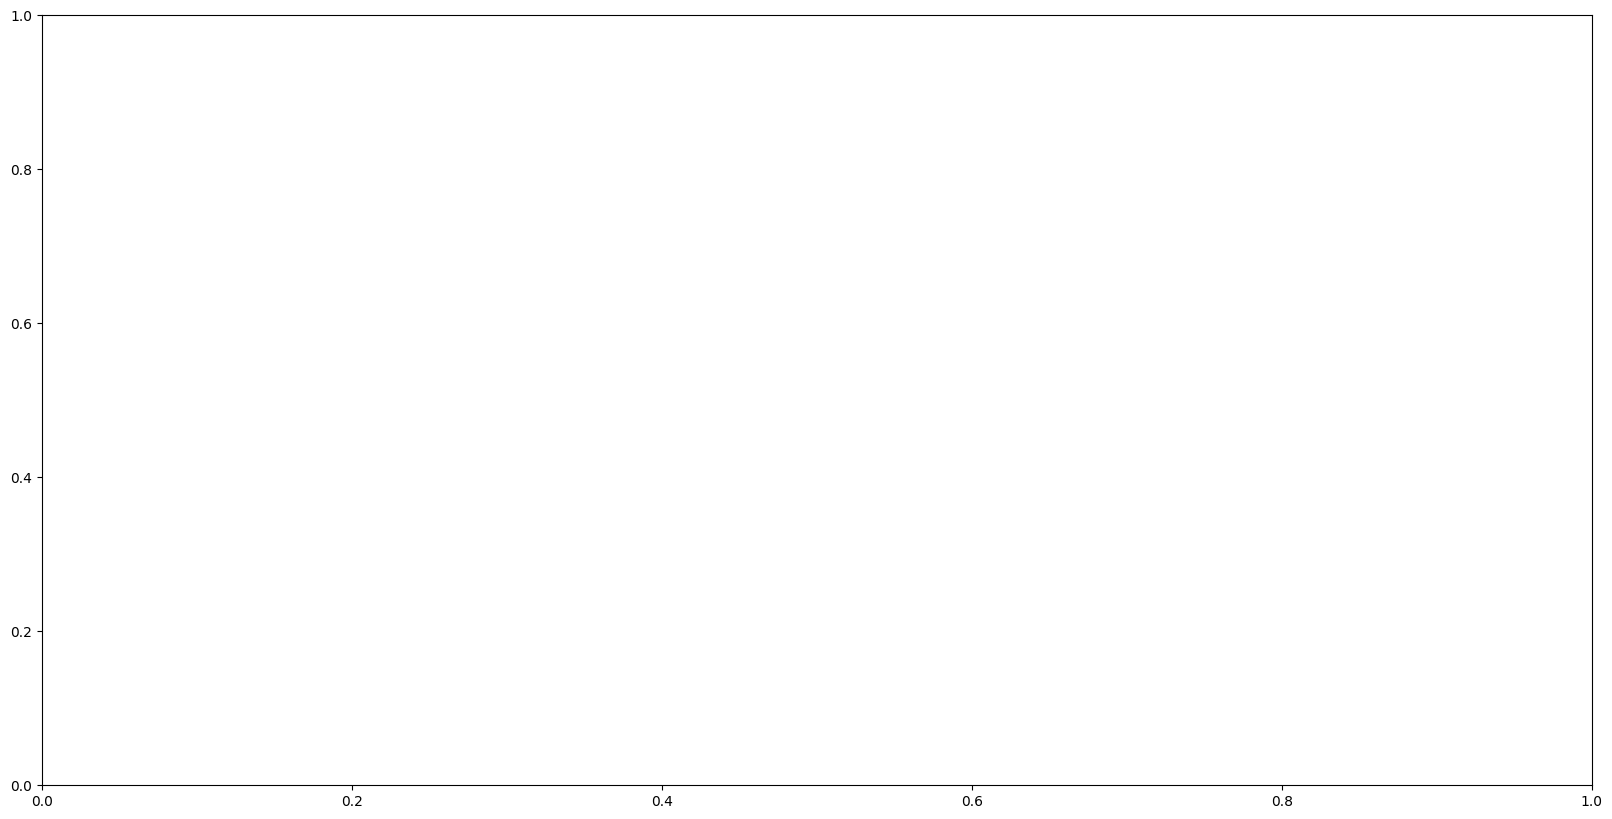

In [51]:
# Plotting a barchart for the crimes committed in the last ten years
plt.figure(figsize=(20,10))
bars = plt.bar(crime_ten_yrs.index, crime_ten_yrs.values, color='red')
plt.xlabel('Crimes', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title("Crimes committed in the last ten Years(2013-2023)", weight='bold')
plt.xticks(rotation=90)
plt.bar_label(bars, fmt='%.0f', padding=3, fontsize=6)
plt.show()

In [ ]:
# top 
# Count all crime types from the index
crime_type_counts = crime_ten_yrs.index.value_counts()
print("\nCrime type counts (2013–2023):\n", crime_type_counts)


Crime type counts (2013–2023):
 0          1
1          1
3          1
4          1
5          1
          ..
7784659    1
7784660    1
7784661    1
7784662    1
7784663    1
Name: count, Length: 2604043, dtype: int64


In [ ]:
# Create vertical bar chart
plt.figure(figsize=(20,10))
bars = plt.bar(crime_type_counts.index, crime_type_counts.values, color="#1f77b4")

# Add chart title and labels
plt.title("All Crime Types Recorded (2013–2023)", fontsize=16, weight="bold")
plt.xlabel("Crime Type", fontsize=12)
plt.ylabel("Number of Records", fontsize=12)

# Rotate x labels for readability
plt.xticks(rotation=75, ha="right")

# Add labels on top of bars
plt.bar_label(bars, fmt="%.0f", padding=3)

# Show chart
plt.tight_layout()
plt.show()# 

# Top Ten Crimes in the Last Ten Years (2013-2023)

In [ ]:
# Sort crime counts and take Top 10
top_crimes = crime_ten_yrs['primary_type'].value_counts().sort_values(ascending=False).head(10)
print("Top ten crimes in the last ten years\n",top_crimes)

In [ ]:
# Create vertical bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(top_crimes.index, top_crimes.values, color="#47b41f")

# Add chart title and labels
plt.title("Top 10 Crime Types Recorded (2013–2023)", fontsize=16, weight="bold")
plt.xlabel("Crime Type", fontsize=12)
plt.ylabel("Number of Records", fontsize=12)

# Rotate x labels
plt.xticks(rotation=45, ha="right")

# Add value labels on top of bars
plt.bar_label(bars, fmt="%.0f", padding=3)

# displaying chart
plt.show()

**Theft (2013-2023)**

In [ ]:
# selecting the theft in the last ten years
theft = crime_ten_yrs.loc["THEFT"]

In [2]:
# Getting the number of counts of each crime theft in the last 10 years
theft_ten_yrs = crime_ten_yrs[crime_ten_yrs["primary_type"] == "THEFT"].value_counts()
print("\nTheft recorded from (2013–2023):\n", theft_ten_yrs)

NameError: name 'crime_ten_yrs' is not defined

In [1]:
# grouping the theft by year
theft_grouped_by_10yr = theft_ten_yrs.groupby("year").sum().sort_values(ascending= True)
print("Theft by Year:\n",theft_grouped_by_10yr)

NameError: name 'theft_ten_yrs' is not defined

In [ ]:
# #Grouping by year and count
# theft_by_year = theft_crime.groupby("year").size()

# # Plotting the line chart
# plt.figure(figsize=(10,6))
# sns.lineplot(x=theft_by_year.index, y=theft_by_year.values, 
#              marker="o", color="crimson", linewidth=2)

# # Adding the chart details
# plt.title("Theft Cases Recorded (2013–2023)", fontsize=16, weight="bold")
# plt.xlabel("Year", fontsize=12)
# plt.ylabel("Number of Thefts", fontsize=12)

# # Add grid 
# plt.grid(True, linestyle="--", alpha=0.6)

# plt.show()

**BATTERY (2013-2023)**

In [ ]:
# Checking the Battery in the last ten years
battery = crime_ten_yrs.loc['BATTERY']
print(f"Total BATTERY crime recorded: {battery}\n")# 

# Checking the battery in the last ten years
battery_ten_yrs = crime_ten_yrs[crime_ten_yrs['primary_type']=='BATTERY'].value_counts(ascending=True)
print(f"Battery recorded from 2013-2023\n {battery_ten_yrs}\n")

# Grouping the Battery by Year
battery_grouped_by_10years = battery_ten_yrs.groupby('year').sum().sort_values(ascending=True)
print("Battery by Year:\n",battery_grouped_by_10years)

**CRIMINAL DAMAGE (2013-2023)**

In [ ]:
# Checking the criminal_damagein the last ten years
criminal_damage = top_ten_crimes.loc['CRIMINAL DAMAGE']
print(f"Total Criminal damage recorded: {criminal_damage}\n")

# Checking the criminal_damage in the last ten years
criminal_damage_ten_yrs = crime_dataset_ten_yrs[crime_dataset_ten_yrs['primary_type']=='CRIMINAL DAMAGE'].value_counts(ascending=True)
print(f"Criminal damage recorded from 2013-2023\n {criminal_damage_ten_yrs}\n")

# Grouping the criminal_damage by Year
criminal_damage_grouped_by_10years = criminal_damage_ten_yrs.groupby('year').sum().sort_values(ascending=True)
print("Criminal damage by Year:\n",criminal_damage_grouped_by_10years)